##   INFOSYS STOCK MARKETING PRICE PREDICTION FROM [01-07-2015 to 01-07-2020(5 Years)]
###  DATASET FROM NSE India (National Stock Exchange of India Ltd)
###  LOGISTIC REGRESSION

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
INFOSYS= pd.read_csv("C://Users//hp//Desktop//STOCK_MARKET//INFY.NS.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[['Date','Open', 'High', 'Low','Close','Adj Close','Volume']]
INFOSYS.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-01,494.5,502.500000,493.000000,498.700012,415.561249,6880852.0
1,2015-07-02,499.5,500.700012,492.524994,494.000000,411.644745,4007568.0
2,2015-07-03,494.0,496.500000,491.000000,495.149994,412.603058,2695306.0
3,2015-07-06,492.5,494.000000,487.500000,491.649994,409.686493,4305602.0
4,2015-07-07,492.5,495.000000,489.500000,490.250000,408.519897,3497418.0


In [4]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [5]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1227 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.7+ KB


In [6]:
INFOSYS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03
mean,605.359984,611.994194,598.518723,605.161715,557.417386,8.675740e+06
std,103.981567,105.130168,103.068678,104.111674,118.345056,7.941786e+06
min,440.000000,443.799988,430.000000,436.700012,390.604187,7.589560e+05
25%,514.187500,519.762482,509.349991,513.974976,451.269745,5.361510e+06
50%,586.025024,592.450012,580.000000,585.950012,517.107422,7.023516e+06
75%,704.924988,711.725006,695.975006,704.262512,676.590088,9.551616e+06
max,843.299988,847.000000,835.049988,840.150024,810.035217,1.644050e+08


In [7]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
layout = go.Layout(
    title='STOCK PRICE OF INFOSYS',
        xaxis=dict(
            title='date',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='blue'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='red'
        )
    )
)
INFOSYS_DATA = [{'x':INFOSYS['Date'], 'y':INFOSYS['Close']}]
plot = go.Figure(data=INFOSYS_DATA, layout=layout)

In [9]:
iplot(plot)

In [10]:
INFOSYS['Open-Close']= INFOSYS.Close - INFOSYS.Open
INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
INFOSYS = INFOSYS.dropna()
X= INFOSYS[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,4.200012,9.500000
1,-5.500000,8.175018
2,1.149994,5.500000
3,-0.850006,6.500000
4,-2.250000,5.500000


In [11]:
Y= np.where(INFOSYS['Close'].shift(-1)>INFOSYS['Close'],1,-1)

In [12]:
split_percentage = 0.7
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [14]:
model = LogisticRegression()
model = model.fit (X_train,Y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open-Close,[-0.007390438319856332]
1,High-Low,[-0.005753108670257038]


In [15]:
probability = model.predict_proba(X_test)
print(probability)

[[0.47610588 0.52389412]
 [0.47891688 0.52108312]
 [0.48600911 0.51399089]
 [0.50555454 0.49444546]
 [0.48043233 0.51956767]
 [0.4845588  0.5154412 ]
 [0.50262667 0.49737333]
 [0.50039914 0.49960086]
 [0.49230357 0.50769643]
 [0.49074472 0.50925528]
 [0.50735812 0.49264188]
 [0.48133257 0.51866743]
 [0.49602322 0.50397678]
 [0.48766037 0.51233963]
 [0.5023712  0.4976288 ]
 [0.48865116 0.51134884]
 [0.54608164 0.45391836]
 [0.50370086 0.49629914]
 [0.48729157 0.51270843]
 [0.49357111 0.50642889]
 [0.51458682 0.48541318]
 [0.50672543 0.49327457]
 [0.47709609 0.52290391]
 [0.50649983 0.49350017]
 [0.50155087 0.49844913]
 [0.49150269 0.50849731]
 [0.5055264  0.4944736 ]
 [0.49358607 0.50641393]
 [0.55722427 0.44277573]
 [0.51399325 0.48600675]
 [0.49467347 0.50532653]
 [0.51070428 0.48929572]
 [0.5100165  0.4899835 ]
 [0.49148606 0.50851394]
 [0.50419339 0.49580661]
 [0.48402989 0.51597011]
 [0.48711873 0.51288127]
 [0.4800087  0.5199913 ]
 [0.49692203 0.50307797]
 [0.49193132 0.50806868]


In [16]:
predicted = model.predict(X_test)

In [17]:
print(metrics.confusion_matrix(Y_test, predicted))

[[ 79  96]
 [ 66 128]]


In [18]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.54      0.45      0.49       175
           1       0.57      0.66      0.61       194

    accuracy                           0.56       369
   macro avg       0.56      0.56      0.55       369
weighted avg       0.56      0.56      0.56       369



In [19]:
print(model.score(X_test,Y_test))

0.5609756097560976


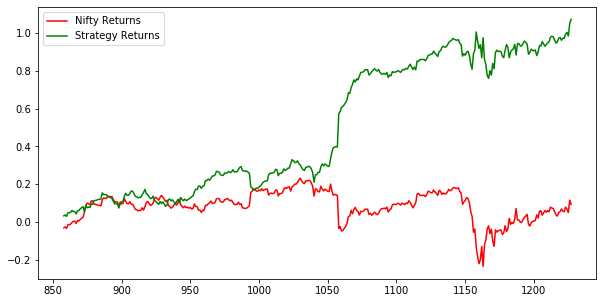

In [20]:
INFOSYS['Predicted_Signal'] = model.predict(X)
INFOSYS['Nifty_returns'] = np.log(INFOSYS['Close']/INFOSYS['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(INFOSYS[split:]['Nifty_returns'])

INFOSYS['Startegy_returns'] = INFOSYS['Nifty_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(INFOSYS[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [21]:
print('Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression ',model.score(X_test,Y_test))

Accuracy of Infosys_Stock_Market_Price_Prediction using Logistic Regression  0.5609756097560976


In [22]:
cross_val = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=100)
print('Accuracy of Infosys_Stock_Market_Price_Prediction after Cross_validation')
print(cross_val)
print(cross_val.mean())

Accuracy of Infosys_Stock_Market_Price_Prediction after Cross_validation
[0.38461538 0.61538462 0.53846154 0.69230769 0.46153846 0.30769231
 0.53846154 0.38461538 0.53846154 0.46153846 0.61538462 0.23076923
 0.46153846 0.53846154 0.53846154 0.53846154 0.53846154 0.61538462
 0.53846154 0.46153846 0.69230769 0.53846154 0.76923077 0.46153846
 0.53846154 0.61538462 0.38461538 0.33333333 0.41666667 0.58333333
 0.41666667 0.75       0.5        0.5        0.5        0.75
 0.58333333 0.41666667 0.41666667 0.58333333 0.66666667 0.5
 0.5        0.5        0.41666667 0.41666667 0.25       0.25
 0.33333333 0.5        0.66666667 0.41666667 0.5        0.66666667
 0.58333333 0.5        0.5        0.33333333 0.66666667 0.5
 0.66666667 0.58333333 0.5        0.5        0.5        0.5
 0.58333333 0.41666667 0.5        0.75       0.41666667 0.66666667
 0.5        0.41666667 0.41666667 0.5        0.58333333 0.58333333
 0.5        0.41666667 0.75       0.41666667 0.5        0.58333333
 0.66666667 0.58333333